*italicized text*

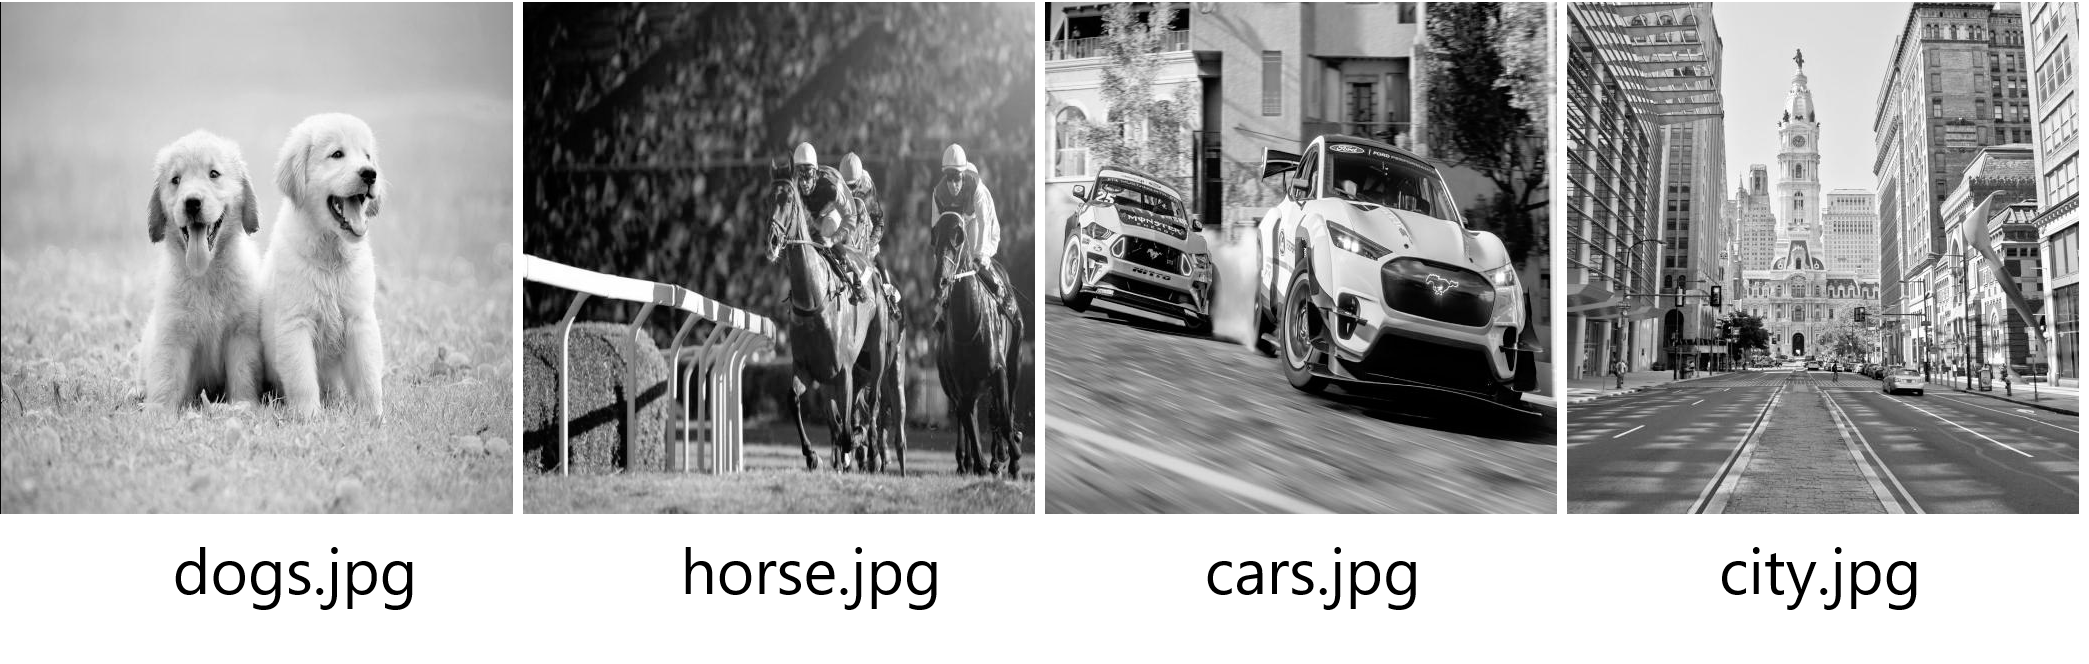
#Choose an image from the above options
#And then click on run (▶) at the top left corner

Downloading...
From: https://drive.google.com/uc?id=1smEOaNoh_wlmNpfx4jCyeXXGxeEAcyVr
To: /content/model.h5
100%|██████████| 218M/218M [00:03<00:00, 66.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PLifWgpn3C3gtwFJxXBLfMPlPZ3gkAe4
To: /content/weights.h5
100%|██████████| 218M/218M [00:04<00:00, 52.6MB/s]
/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 30 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


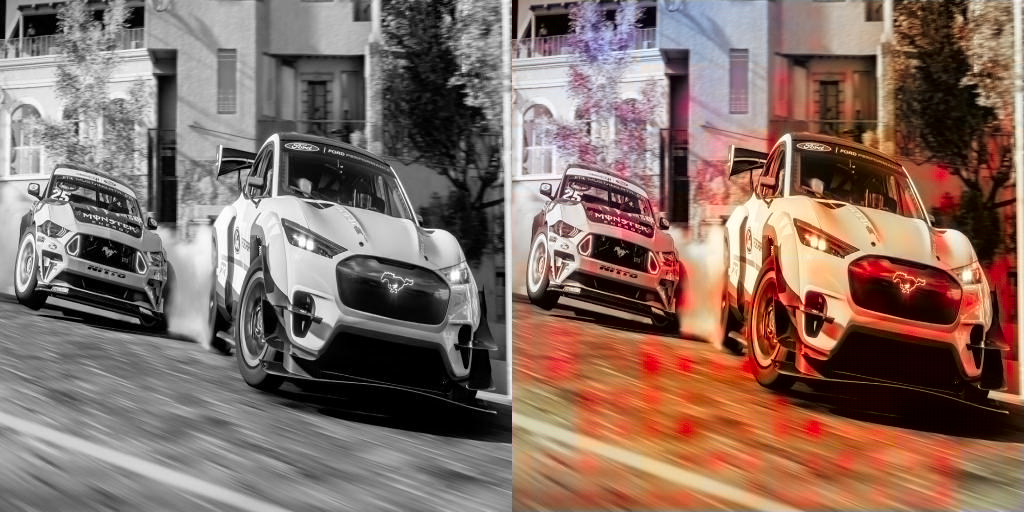

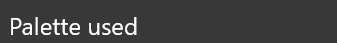

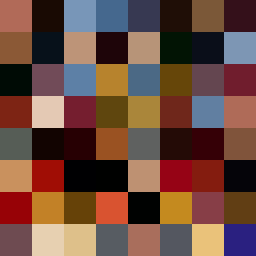

In [ ]:

import time
from matplotlib import pyplot as plt
from IPython import display
import shutil
import numpy as np
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2
import os
from skimage.io import imsave
import keras.backend as k
import tensorflow as tf
from keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout, ZeroPadding2D, UpSampling2D,Concatenate,concatenate,RepeatVector
from keras.models import Model, Sequential,load_model
from keras import backend as K
# from keras.optimizers import Adam, RMSprop
from keras.initializers import RandomNormal
import tensorflow as tf
import random
import numpy as np
import json
import os
import pickle as pkl
from tensorflow.keras.losses import huber,mean_absolute_error
import gdown

# model
if(not os.path.isfile("model.h5")):
    url = "https://drive.google.com/file/d/1smEOaNoh_wlmNpfx4jCyeXXGxeEAcyVr/view?usp=sharing"
    output = "model.h5"
    gdown.download(url, output, quiet=False,fuzzy=True)

# weights
if( not os.path.isfile("weights.h5")):
    url = "https://drive.google.com/file/d/1PLifWgpn3C3gtwFJxXBLfMPlPZ3gkAe4/view?usp=sharing"
    output = "weights.h5"
    gdown.download(url, output, quiet=False,fuzzy=True)

# download sample image folder
if( not os.path.isdir("sample_images")):
    url = "https://drive.google.com/drive/folders/1oPMHtkMtQgZn_39TB0a_Iw83U7PTkgtt?usp=sharing"
    gdown.download_folder(url, quiet=True, use_cookies=False)

img_shape = (512,512)
input_image = 'car.jpg' #@param ['dogs.jpg','horse.jpg', 'car.jpg', 'city.jpg', 'upload image']
input_pellet = 'p3.jpg' #@param ['p1.jpg','p2.jpg','p3.jpg']

    
from google.colab import files

if(input_image=="upload image"):
    print("upload you input image")
    input_image = list(files.upload().keys())[0]

def process_path(path):
    if(os.path.isfile(path)):
        return path

    return "sample_images/"+path


def process():
    image = img_to_array(load_img(process_path(input_image)))
    image = cv2.resize(image,img_shape,interpolation=cv2.INTER_AREA)
    image = np.array(image, dtype=float)
    X = rgb2lab(image*1/255)[:,:,0]


    # path = "p"+str(random.randint(1,6))+".jpg"
    image = img_to_array(load_img(process_path(input_pellet)))
    image = cv2.resize(image,img_shape,interpolation=cv2.INTER_AREA)
    # image = cv2.blur(image,(100, 100), cv2.BORDER_DEFAULT) 
    P = np.array(image,dtype = "float64")/127.5-1

        
    X = X/50-1
    canvas = np.zeros((512,512,4))
    X = np.array(X,dtype = 'float64')
    canvas[:,:,0] = X
    canvas[:,:,1:] = P

    return np.array([canvas])

def toRgb(l,ab):
    z = np.zeros((512,512,3))
    z[:,:,0] = (l+1)*50
    z[:,:,1:] = ab*127
    z = lab2rgb(z)*255
    z = np.flip(z,axis=-1)

    return z

x = process()
model = load_model("model.h5")
# model.load_weights("weights.h5")
y = model.predict(x)
canvas = np.zeros((512,2*512,3))
canvas[:,512:,:] = toRgb(x[0][:,:,0],y[0])
canvas[:,:512,:] = toRgb(x[0][:,:,0],y[0]*0)

# imsave("out.png",canvas)

from google.colab.patches import cv2_imshow
cv2_imshow(canvas)

cv2_imshow(img_to_array(load_img(process_path("palette.png"))))
print()

p = (x[0][:,:,1:]+1)*127
p = np.flip(p,axis = -1)
p = cv2.resize(p,(256,256))
cv2_imshow(p)